# Buildmodel

Build nonlinear time series models from scalar time series data using minimum description length radila basis function formalism

## Sample data

First we generate some typical test data to play with

In [1]:
include("ChaosFunctions.jl")

addnoise (generic function with 1 method)

In [2]:
using Plots

In [3]:
z=lorenzpoints(5000,0.05)

3×5001 Array{Float64,2}:
 -9.3954   -9.11588  -8.65294  -8.14648  …   0.348011  -0.90338  -1.72562
 -9.09342  -8.3313   -7.63451  -7.18491     -2.88828   -2.83896  -3.19333
 28.5537   28.7701   28.4925   27.8354      24.9674    21.8964   19.3518

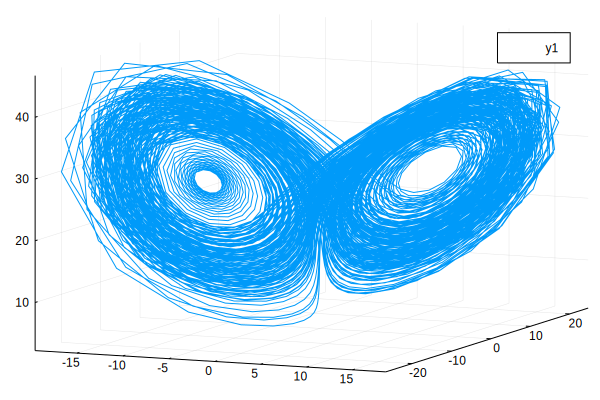

In [4]:
plot(z[1,:],z[2,:],z[3,:])

In [5]:
z=rosslerpoints(5000,0.2)

3×5001 Array{Float64,2}:
 -2.09051    -1.75877    -1.34197   …  -0.459284  -1.49662   -2.20517
 -1.45337    -1.90718    -2.303         3.23109    3.15526    2.90361
  0.0252208   0.0261013   0.027361      3.509      0.936751   0.227118

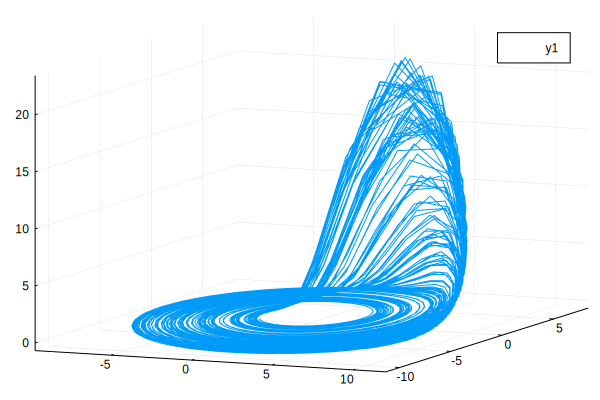

In [6]:
plot(z[1,:],z[2,:],z[3,:])

In [7]:
z=itmap(tinkerbell,-[0.7, 0.6],10000)

2×10000 Array{Float64,2}:
 -0.106024  -0.00524985   0.0848639  …  -0.0789416  -0.43416   -0.148745
 -0.407701  -0.329446    -0.171764      -0.978687   -0.492709  -0.686846

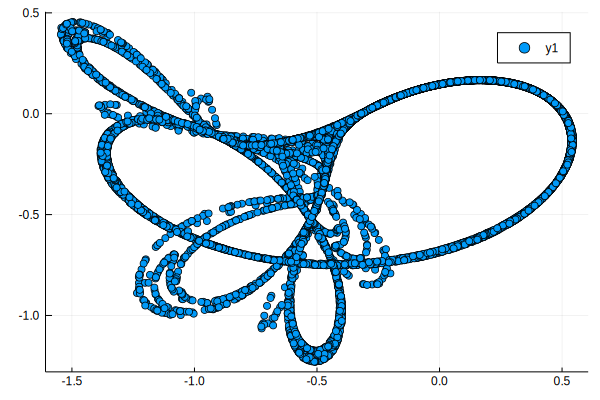

In [8]:
plot(z[2,:],z[1,:],linetype=:dots)

In [9]:
zn=addnoise(z,0.05)

2×10000 Array{Float64,2}:
 -0.0994226   0.00811931   0.0769723  …  -0.0465038  -0.44472  -0.152864
 -0.416986   -0.361391    -0.17428       -0.986089   -0.51032  -0.688874

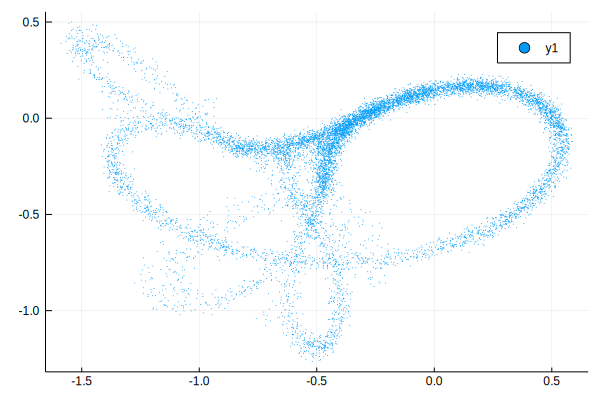

In [10]:
plot(zn[2,:],zn[1,:],linetype=:dots,markersize=0.1)

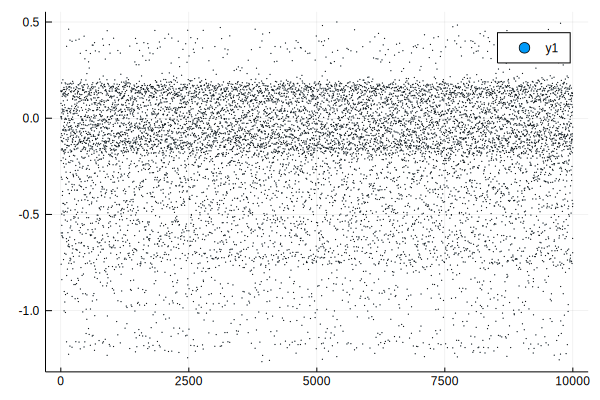

In [11]:
plot(zn[1,:],linetype=:dots,markersize=0.5)

In [12]:
z=itmap(logistic,1/π,10^4);

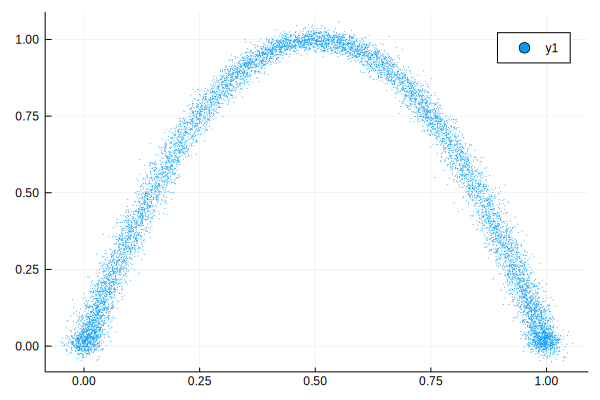

In [13]:
z=itmap(logistic,1/π,10^4);
zn=addnoise(z,0.05)
plot(zn[1:end-1],zn[2:end],linetype=:dots,markersize=0.1)

## Build the model

Import the modelling code, and away we go.

In [14]:
include("BasisFunctionTypes.jl")
include("Place.jl")

Main.Place

Any valid inline function can be used as a penlaty function (it must operate on globally defined functions in `Place.topdown` and must return a scalar, the algorithm seeks a minimum of this function. Four useful examples follow (description length ala `Rissanen` requires extra computation in the main code to account for parameter precisions.

In [15]:
#need to make these variables in scope of the current WS
nx=Int64(length(z))
mss=Float64(Inf)
λ=Array{Float64,1}[]
δ=Array{Float64,1}[]
#valid penalty criteria
Schwarz = :(nx*log(mss)+nk*log(nx))
Akaike = :(nx*log(mss)+2*nk)
Rissanen = :(description(mss,λ,δ,nx)) #Rissanen desciption length
Model30 = :(-nk*(nk<=30))
#nx is # of observation (length of data)
#nk is # of parameters (basis functions in model)
#mss is the mean-sum-square model prediction error
#λ are the model parameters and δ their precisions

:(-nk * (nk <= 30))

Next, the dictionary `options` defined model structure and optional modelling parameters (it'll run a produce something even if `options` is empty, but it might be better to populate this somewhat intelligently. A useful example to model the (admittedly rather simple) logistic map is provided

In [16]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

And, then, away we go...

In [17]:
mymodel, X, zout, mdlv = Place.buildmodel(zn,options)

dx=4, nx=7999
needδ=true
*MSS=0.12394003642798143 DL=3003.7941326130162 size=1
MSS=0.15069089422769796 DL=3786.3471198474404 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=0.07664578483318062 DL=1087.5247823276839 size=2
*MSS=0.0706759762756893 DL=770.0118489956222 size=3
MSS=0.07438449702980715 DL=974.033328750867 size=3
*MSS=0.055650297942019235 DL=-181.57844563893585 size=4
*MSS=0.015593833599876848 DL=-5267.521499986003 size=4
*MSS=0.013324081028152253 DL=-5887.659627861286 size=5
*MSS=0.009411865643874362 DL=-7277.049435671638 size=5
*MSS=0.008032406944348073 DL=-7903.294898775643 size=6
*MSS=0.007544412146960506 DL=-8152.848588487492 size=6
*MSS=0.007156764474654582 DL=-8357.58444533926 size=7
MSS=0.007355586976104562 DL=-8247.177048696138 size=7
*MSS=0.0066895395030047 DL=-8620.712224118617 size=8
*MSS=0.00667079763390964 DL=-8624.484916579244 size=9
*MSS=0.006509285983502777 DL=-8722.734610511585 size=9
*MSS=0.0059240026317807564 DL=-9092.239371731286 

(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [1], 0.8115354685111331, [0.2311017763605281 0.9655728977216914 … 0.24813849949391795 0.9592245514089786], [4.399270695829724]), Main.Place.BasisFunc(tophat, [1], 0.21227574549170242, [0.2311017763605281 0.9655728977216914 … 0.24813849949391795 0.9592245514089786], [4.5772733045539695]), Main.Place.BasisFunc(tophat, [0], 0.4692957556710803, [0.6606785294747014 0.14407606765838382 … 0.7430682373957731 0.13980029760694937], [4.7106140206161875]), Main.Place.BasisFunc(tophat, [1], 0.3503911930731452, [0.2311017763605281 0.9655728977216914 … 0.24813849949391795 0.9592245514089786], [4.916133338373363]), Main.Place.BasisFunc(tophat, [0, 2], 0.6669003706289184, [0.6606785294747014 0.14407606765838382 … 0.7430682373957731 0.13980029760694937; 0.950705515148715 0.43300183333666153 … 0.9308309950925053 0.3867800052917636], [4.5188781799901925]), Main.Place.BasisFunc(tophat, [0, 1, 2], 0.6372357965176437, [0.660678529474701

Modelling done, we can make one-step predictions on time series data

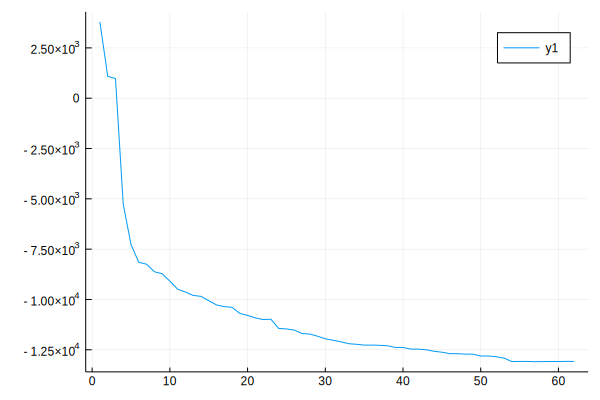

In [18]:
plot(mdlv)

In [19]:
yp,yt,ep = Place.predict(mymodel, z);

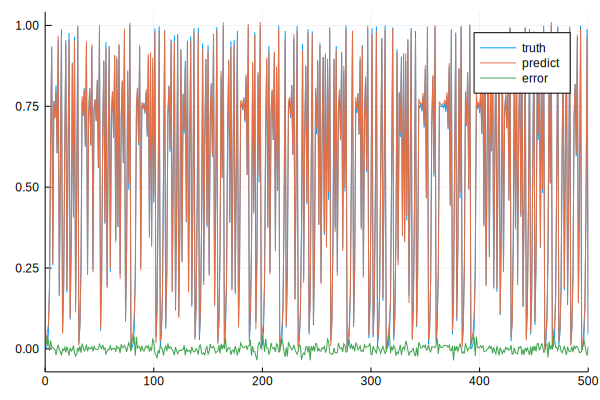

In [20]:
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

Or, free run simulations

In [21]:
yp, yt = Place.freerun(mymodel,zn,500)

([0.04030007698768333, 0.15306587817173462, 0.5075732204379368, 0.9882445350114564, 0.03755248469927053, 0.10987882231622434, 0.37618897746635727, 0.9248644995344745, 0.24751684274433744, 0.7371290541428973  …  0.7093742778423462, 0.8229907048164151, 0.5808746091337289, 0.990371208854286, 0.06906732311013565, 0.2507752195806716, 0.7737965451450634, 0.7279434733088442, 0.8027158333857785, 0.6368085871429301], [-0.004135516030048055, 0.047591150915508106, 0.04308485897235297, 0.2097756961606777, 0.6292290062544208, 0.9264073579270697, 0.25588825859843156, 0.7943759944028397, 0.7174118515245537, 0.8035293555801069  …  0.1411448615432525, 0.503091707505884, 1.0001669225660907, 0.00874172297677214, 0.013652344930284457, 0.05381837628368782, 0.1369106790607732, 0.43813371657087724, 0.9671606401187752, 0.05818906543897892])

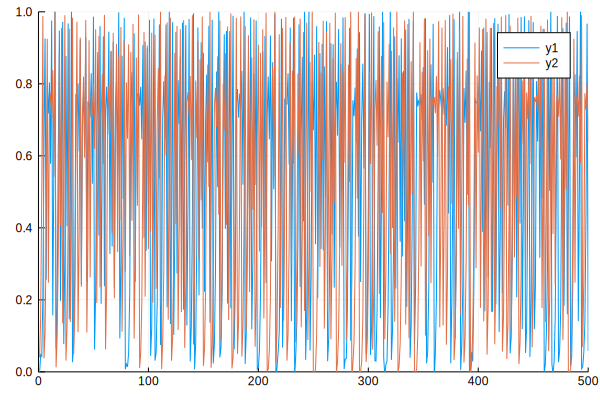

In [22]:
plot(yt)
plot!(yp,ylimit=(0,1),xlimit=(0,500))


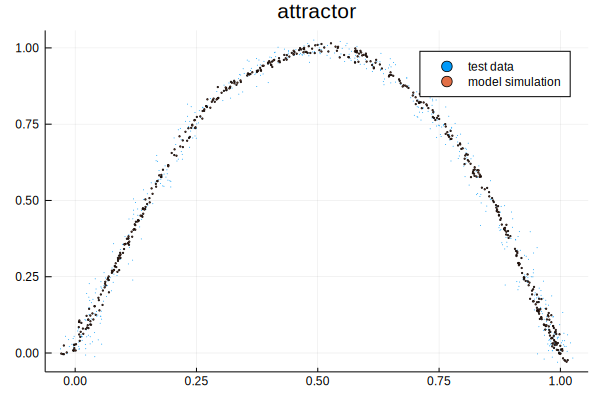

In [23]:
plot(yt[1:end-1],yt[2:end],linetype=:dots,markersize=0.1,label="test data")
plot!(yp[1:end-1],yp[2:end],linetype=:dots,markersize=1,label="model simulation",title="attractor")

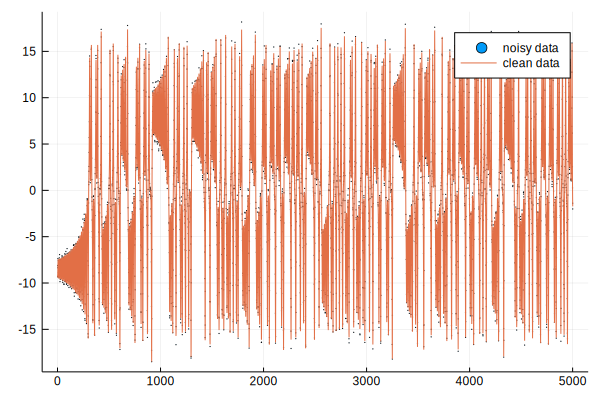

In [24]:
z=lorenzpoints(5000,0.05)
y=z[1,:]
yn=addnoise(y,0.05)
plot(yn,linetype=:dots,markersize=0.5,label="noisy data")
plot!(y,label="clean data")

In [25]:
options=Dict("stopstep"=>10,
    "testdatum"=> 8000,
    "functions"=> (gaussian,tophat),
    "embedding" => Place.vembed([0,1,2,3,6,12]),
 #   "embedding" => ([0, 1], [0, 1, 2, 3]),
    "penalty"=> Rissanen,
    "nneighbours"=> 1
    )

Dict{String,Any} with 6 entries:
  "penalty"     => :(description(mss, λ, δ, nx))
  "stopstep"    => 10
  "embedding"   => ([0], [1], [0, 1], [2], [0, 2], [1, 2], [0, 1, 2], [3], [0, …
  "testdatum"   => 8000
  "functions"   => (gaussian, tophat)
  "nneighbours" => 1

In [26]:
mymodel, X, zout, mdlv = Place.buildmodel(yn,options)

dx=13, nx=4488
needδ=true
*MSS=4.608024788551715 DL=9800.568716590755 size=1
WARNING Qδ=1/δ has no exact solution in 2-D case - giving up
*MSS=3.0381927386286485 DL=8870.871630108837 size=2
*MSS=2.705386774817017 DL=8616.200087750187 size=3
*MSS=2.647013688526906 DL=8572.351714663399 size=4
*MSS=2.602742060622053 DL=8540.37579457407 size=5
*MSS=1.5809010547515412 DL=7423.6987361459005 size=5
*MSS=1.3870148143060703 DL=7128.060014464482 size=5
*MSS=1.1650887194370279 DL=6736.282485325757 size=5
*MSS=1.1572079700657967 DL=6727.161667875454 size=6
MSS=1.1562024082872528 DL=6731.751625522174 size=7
*MSS=0.9041664239070996 DL=6181.252600449593 size=7
*MSS=0.8975713512499341 DL=6171.259086896658 size=8
*MSS=0.8769403331612315 DL=6118.452305904074 size=8
*MSS=0.8528433330249252 DL=6054.450091198367 size=8
*MSS=0.848172840917384 DL=6048.561741328669 size=9
MSS=0.8471449321862154 DL=6051.969018026184 size=10
*MSS=0.7713082410268155 DL=5839.227111784696 size=10
MSS=0.7708848549758551 DL=5844.924

MSS=0.3098060452238818 DL=4135.821220828268 size=69
MSS=0.30806814586653186 DL=4128.175518644536 size=69
MSS=0.30804453023007916 DL=4135.61234230869 size=70
MSS=0.3076254856132143 DL=4131.881987809796 size=70
MSS=0.3076013385586512 DL=4137.880238187372 size=71


(Main.Place.PlaceModel(Main.Place.BasisFunc[Main.Place.BasisFunc(tophat, [0, 1, 3], 9.475972753781209, [5.570189471981644 3.9423367415352693 … -4.1201982772382495 15.379589242413905; 8.470896351188726 9.562071749378331 … -2.6689582843312247 11.999603910096933; 11.540321658202762 17.603779875679237 … -1.559981209330403 6.639473113075998], [4.82358971035093]), Main.Place.BasisFunc(tophat, [3], 3.6837610420905653, [11.540321658202762 17.603779875679237 … -1.559981209330403 6.639473113075998], [4.83537820457161]), Main.Place.BasisFunc(tophat, [1, 2], 6.865505446464275, [8.470896351188726 9.562071749378331 … -2.6689582843312247 11.999603910096933; 10.019196610830237 15.10817305058284 … -2.50400324286111 7.715714843584131], [3.214075999730363]), Main.Place.BasisFunc(tophat, [3, 12], 12.275449169827763, [11.540321658202762 17.603779875679237 … -1.559981209330403 6.639473113075998; 5.152186147640645 0.5457773196469601 … 13.855917456160755 4.505676607827135], [4.180145755156399]), Main.Place.Ba

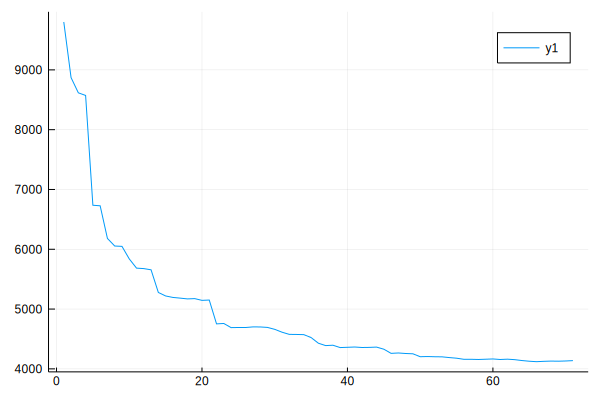

In [27]:
plot(mdlv)

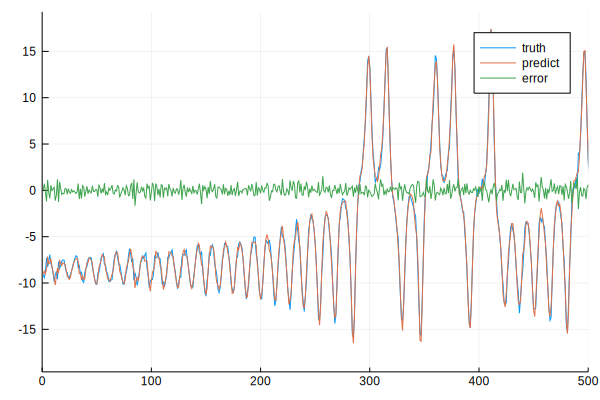

In [28]:
yp,yt,ep = Place.predict(mymodel, yn);
plot(yt,label="truth")
plot!(yp,label="predict")
plot!(ep,label="error",xlimit=(0,500))

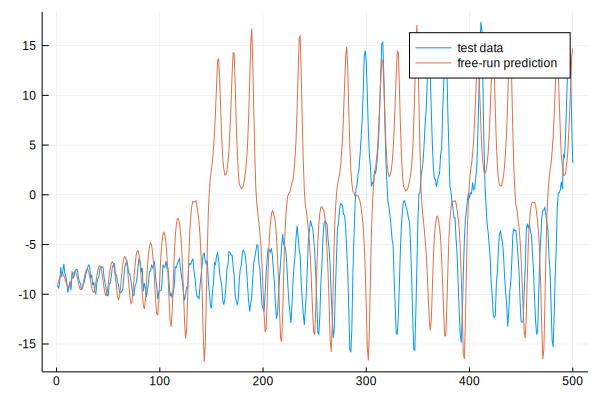

In [29]:
yp, yt = Place.freerun(mymodel,yn,500)
plot(yt,label="test data")
plot!(yp,label="free-run prediction")

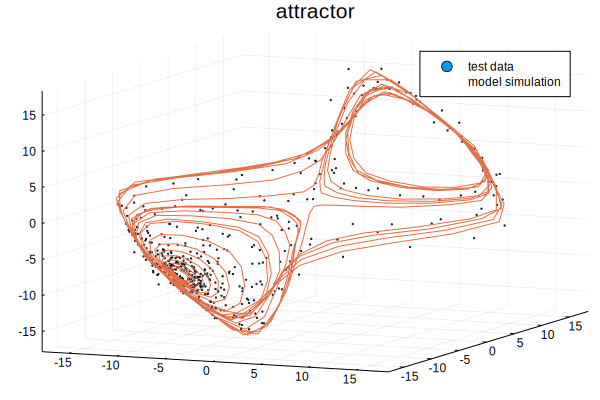

In [30]:
plot(yt[1:end-6],yt[4:end-3],yt[7:end],linetype=:dots,markersize=1,label="test data")
plot!(yp[1:end-6],yp[4:end-3],yp[7:end],label="model simulation",title="attractor")

## Michael Small

Last updated 12/7

In [31]:
size(yn)

(5001,)

In [32]:
yn

5001-element Array{Float64,1}:
 -9.280769830987461
 -9.325511714465268
 -8.356141558761689
 -7.368180485935023
 -8.129607513927205
 -8.128123773922574
 -8.088658498250492
 -7.590251981487498
 -8.884604766792874
 -8.594821669244036
 -8.91665890661105
 -9.241757288842917
 -9.229700326766608
  ⋮
  3.904099220405545
  6.908788385007819
  8.8765527700866
 12.759897534293062
 15.902436130667006
 15.043217977286973
 10.064315845399786
  6.1781956471089625
  2.5440579232232134
  0.2599654458315386
 -1.3831790830841049
 -2.0080719919357124